Imports

In [1]:
import os
import torchmetrics as torchmetrics
from subgraph_matching_via_nn.mask_binarization.localization_binarization_simulator import LocalizationBinarizationSimulator
from subgraph_matching_via_nn.mask_binarization.indicator_dsitribution_binarizer import IndicatorBinarizationBootType, \
    IndicatorBinarizationType

c:\users\kogan\.virtualenvs\subcircuit_recognition-mmb-fima\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Simulation execution

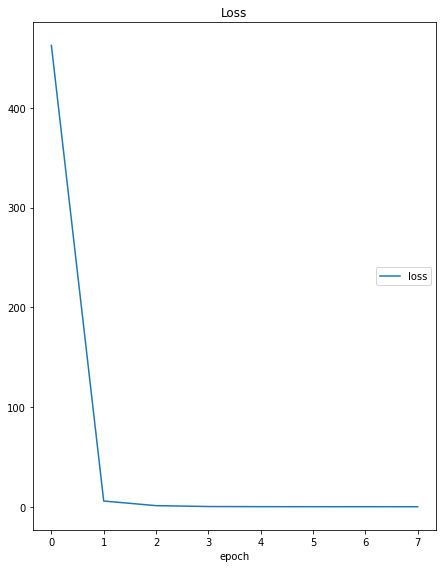

Loss
	loss             	 (min:    0.340, max:  462.398, cur:    0.340)


In [2]:
output_path = f".{os.sep}simulation_results"

simulator = LocalizationBinarizationSimulator(n_graph=10, n_subgraph=7, to_line=True)
simulator.run_simulation(num_localizations=1, results_output_path=output_path)

localization_results = LocalizationBinarizationSimulator.load_localization_results(output_path)

Evaluation

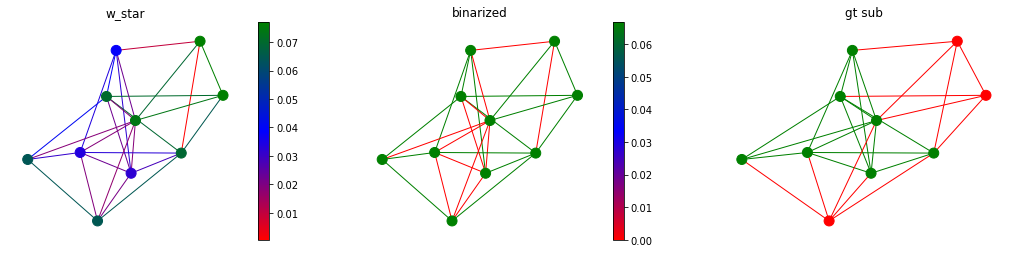

['0.9800', '1.0564', '1.1491'] : init standardized_raw moments
['0.9925', '1.0224', '1.0599'] : sub standardized_raw moments
['0.9925', '1.0224', '1.0599'] : GT standardized_raw moments
['0.0212', '3.2975', '3.9081', '4.5727', '5.4232', '6.2769', '7.6509', '8.1738', '9.9692'] : init Laplacian eigs
['0.0000', '3.8437', '3.9251', '4.5356', '5.4803', '6.2340', '7.5915', '8.0000', '8.3807'] : sub Laplacian eigs
['-0.0000', '3.8437', '3.9251', '4.5356', '5.4803', '6.2340', '7.5915', '8.0000', '8.3807'] : GT Laplacian eigs
init loss (no reg): 0.3211751335369126
init full loss (with reg): 0.3211751335369126
['0.0212', '3.2975', '3.9081', '4.5727', '5.4232', '6.2769', '7.6509', '8.1738', '9.9692'] : w_star Laplacian eigs
['-0.0000', '0.8425', '1.9511', '2.4996', '3.0796', '3.5505', '4.0328', '5.0000', '5.0000'] : binarized Laplacian eigs

to_line = True

loss = 0.3211751335369126, reg_params = [0], reg_terms = ['graph_total_variation']
loss_ref = 1.3250885834859244e-11, reg_param = [0], reg_te

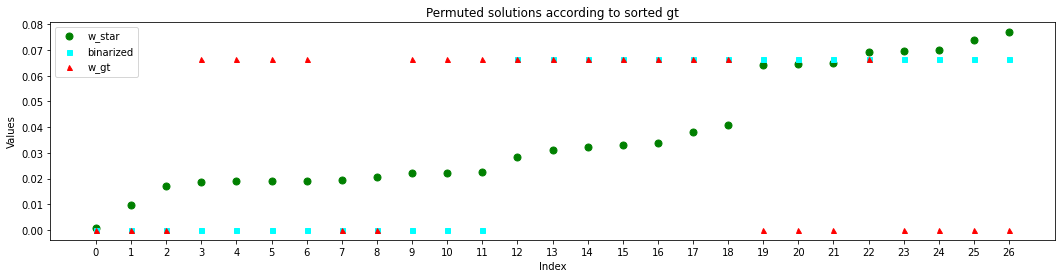

Metric: Accuracy
w_star: 0.5555555820465088

Metric: Accuracy
binarized: 0.48148149251937866

Metric: Accuracy
w_gt: 1.0

Metric: Precision
w_star: 1.0

Metric: Precision
binarized: 0.5333333611488342

Metric: Precision
w_gt: 1.0

Metric: F1Score
w_star: 0.7142857313156128

Metric: F1Score
binarized: 0.5333333611488342

Metric: F1Score
w_gt: 1.0

Finished processing a localization result


In [3]:
performance_metric_name_to_func_map = {}
performance_metric_name_to_func_map["Accuracy"] = torchmetrics.Accuracy(task="binary", average='micro', num_classes=2)
performance_metric_name_to_func_map["Precision"] = torchmetrics.Precision(task="binary", average='micro', num_classes=2)
performance_metric_name_to_func_map["F1Score"] = torchmetrics.F1Score(task="binary", average='micro', num_classes=2)

series_binarization_types = [IndicatorBinarizationBootType.OptimalElement]
element_binarization_types = [IndicatorBinarizationType.TopK]

for localization_result in localization_results:
    all_binarized_indicators_map = {}

    solver = localization_result.solver

    for series_binarization_type, element_binarization_type in zip(series_binarization_types, element_binarization_types):
        binarized_indicators_map = LocalizationBinarizationSimulator.apply_binarization_scheme(solver, localization_result.processed_sub_graph, localization_result.sub_graph, localization_result.w_all, series_binarization_type, element_binarization_type, localization_result.params)
        all_binarized_indicators_map = {**all_binarized_indicators_map, **binarized_indicators_map}
        #TODO: allow binarization thresholds/params

    LocalizationBinarizationSimulator.show_localization_results(localization_result.solver, localization_result.processed_sub_graph, localization_result.sub_graph, all_binarized_indicators_map, localization_result.params)

    LocalizationBinarizationSimulator.apply_performance_metrics(localization_result.gt_indicator_tensor, all_binarized_indicators_map, performance_metric_name_to_func_map)

    print("Finished processing a localization result")

In [4]:
# edges may overlap, but still have other weights